# Multilayer Perceptorn

Solution to exercises proposed in [1].


**References:**

[1] [Building makemore Part 2: MLP](https://www.youtube.com/watch?v=TCH_1BHY58I&t=2197s&ab_channel=AndrejKarpathy)

[2] [Bengio et al. 2003 MLP language model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

**Exercises:**

0. *Implement the network on the image and overfit the first batch (of 32 samples)*

1. *Tune the hyperparameters of the training to beat my best validation loss of 2.2*

2.  *I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?*

3. *Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?*


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2022-11-30 16:22:42--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.003s  

2022-11-30 16:22:43 (81.5 MB/s) - ‘names.txt’ saved [228145/228145]



In [4]:
words = open("names.txt", "r").read().splitlines()

In [5]:
chars = sorted(list(set("".join(words))))
stoi = {s:idx + 1 for idx, s in enumerate(chars)}
stoi["."] = 0
itos = {idx: s for s, idx in stoi.items()}

In [6]:
block_size = 3

In [7]:
def build_dataset(words):  
    X, Y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [8]:
x, y = build_dataset(words)

torch.Size([228146, 3]) torch.Size([228146])


In [9]:
# compute random indices.
m = len(x)

rand_idxs = torch.randperm(m)
# shuffle the data.
x = x[rand_idxs]
y = y[rand_idxs]
n1 = int(0.8 * m)
n2 = int(0.9 * m)

x_train = x[:n1]
y_train = y[:n1]
x_val = x[n1:n2]
y_val = y[n1:n2]
x_test = x[n2:]
y_test = y[n2:]

## 0. *Implement the network on the image and overfit the first batch (of 32 samples)*

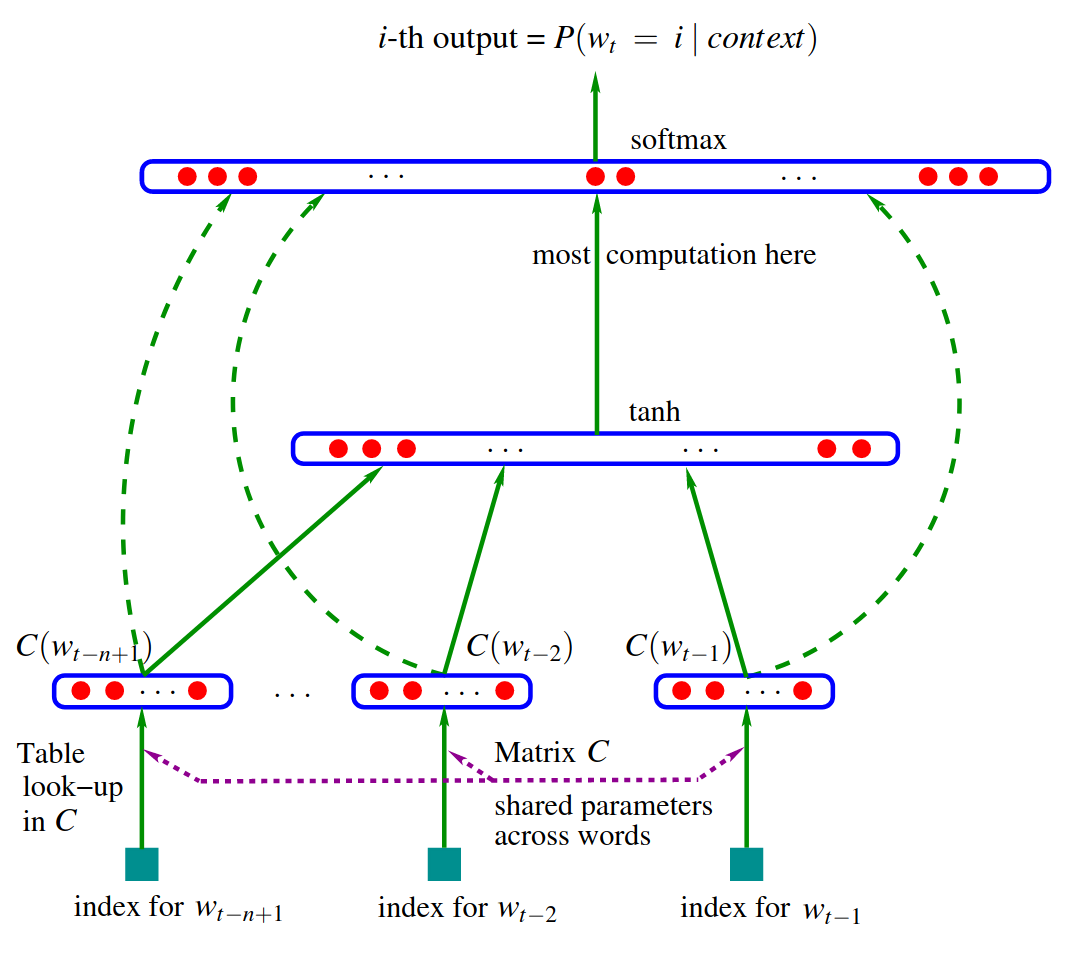

**Build the embedding matrix**

In [ ]:
c = torch.randn((27, 2))
c[x_train].shape

torch.Size([182516, 3, 2])

**Index into embedding matrix and reshape it**

In [ ]:
emb_train = c[x_train].view(-1, 6)
emb_train.shape

torch.Size([182516, 6])

**Implement the hidden layer**

In [ ]:
w1 = torch.randn((6, 100))
b1 = torch.randn((1, 100))
w1.shape

torch.Size([6, 100])

**Implement the output layer**

In [ ]:
w2 = torch.randn((100, 27))
b2 = torch.randn((1, 27))

**Putting it all together**

In [ ]:
c = torch.randn((27, 2))
w1 = torch.randn((6, 100))
b1 = torch.randn((1, 100))
w2 = torch.randn((100, 27))
b2 = torch.randn((1, 27))
params = [c, w1, b1, w2, b2]

### Overfit the first batch

In [ ]:
BATCH_SIZE = 32
x_batch = x[: BATCH_SIZE, :]
y_batch = y[: BATCH_SIZE]
x_batch.shape
y_batch.shape

torch.Size([32])

In [ ]:
LEARN_RATE = 0.1
N_ITERS = 10000

g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [c, w1, b1, w2, b2]

# Make sure to enable gradients!
for p in params:
    p.requires_grad = True

# Training loop
for k in range(N_ITERS):
    # Forward pass
    emb = c[x_batch]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, y_batch)

    # Backward pass

    # Zero all of the gradietns
    for p in params:
        p.grad = None

    loss.backward()

    # Update the parameters
    for p in params:
        p.data = p.data - LEARN_RATE * p.grad

print(f"loss: {loss.item()}")

loss: 0.10336769372224808


**Inspect predictions**

In [ ]:
logits.argmax(1)

tensor([ 1, 18, 19, 15, 19, 14, 19,  1, 20,  0,  5, 14, 15,  1, 19, 14,  1,  0,
         0,  9, 25, 18, 19, 13,  5,  0,  0,  1, 20,  0, 18,  9])

In [ ]:
y_batch

tensor([ 1, 18, 19, 15, 19, 14, 19,  1, 20,  0, 18, 14, 15,  1, 19, 14,  1,  0,
         0,  9, 25, 18, 13, 13,  5,  0,  0,  1, 20,  0, 18,  9])

In [ ]:
y_batch == logits.argmax(1)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True])

## 1. *Tune the hyperparameters of the training to beat my best validation loss of 2.2*

### Beating the score

**Train $n$ networks**

We will tweak the batch size and learn rate to find a "optimal" set of params, than we'll try to fine tune that set of params to get $loss < 2.2$. 

**Neat way to iterate over all combinations of hyper-parameters :)**

In [ ]:
params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01, 0.001]
}

from sklearn.model_selection import ParameterGrid
param_grid = ParameterGrid(params)

for p in param_grid:
    print(p)

In [ ]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01],
    "num_iters": [50000]
}

param_grid = ParameterGrid(params)

for pset in tqdm(param_grid):
    # Build network
    g = torch.Generator().manual_seed(2147483647)
    c = torch.randn((27, 10), generator=g, requires_grad=True)
    w1 = torch.randn((30, 200), generator=g, requires_grad=True)
    b1 = torch.randn(200, generator=g)
    w2 = torch.randn((200, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    params = [c, w1, b1, w2, b2]

    # Make sure to enable gradients!
    for p in params:
        p.requires_grad = True

    # Training loop
    for k in range(pset["num_iters"]):
        # Sample a random batch of data
        rand_idxs = torch.randint(0, x_train.shape[0], (pset["batch_size"], ))
        x_batch = x_train[rand_idxs]
        y_batch = y_train[rand_idxs]

        # Forward pass
        emb = c[x_batch]
        h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
        logits = h @ w2 + b2
        loss = F.cross_entropy(logits, y_batch)
        
        # Backward pass
        # Zero all of the gradietns
        for p in params:
            p.grad = None

        loss.backward()

        # Update the parameters
        lr = (pset["learn_rate"] / 10) if k > pset["num_iters"] / 2 else pset["learn_rate"] 
        for p in params:
            p.data = p.data - lr * p.grad

    with torch.no_grad():
        emb = c[x_val]
        h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
        logits = h @ w2 + b2
        val_loss = F.cross_entropy(logits, y_val)
        print(f"pset: {pset}, val_loss: {val_loss.item()}")

  7%|▋         | 1/15 [00:22<05:10, 22.20s/it]

pset: {'batch_size': 16, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.278085708618164


 13%|█▎        | 2/15 [00:45<04:59, 23.01s/it]

pset: {'batch_size': 16, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2882742881774902


 20%|██        | 3/15 [01:08<04:32, 22.74s/it]

pset: {'batch_size': 16, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.551913022994995


 27%|██▋       | 4/15 [01:32<04:18, 23.48s/it]

pset: {'batch_size': 32, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.265277624130249


 33%|███▎      | 5/15 [01:57<03:59, 23.95s/it]

pset: {'batch_size': 32, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.297966241836548


 40%|████      | 6/15 [02:25<03:46, 25.15s/it]

pset: {'batch_size': 32, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.5558559894561768


 47%|████▋     | 7/15 [02:58<03:43, 27.97s/it]

pset: {'batch_size': 64, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.232607126235962


 53%|█████▎    | 8/15 [03:30<03:23, 29.10s/it]

pset: {'batch_size': 64, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2887184619903564


 60%|██████    | 9/15 [04:01<02:59, 29.88s/it]

pset: {'batch_size': 64, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.5236148834228516


 67%|██████▋   | 10/15 [04:42<02:46, 33.29s/it]

pset: {'batch_size': 128, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2343952655792236


 73%|███████▎  | 11/15 [05:23<02:22, 35.50s/it]

pset: {'batch_size': 128, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.278352737426758


 80%|████████  | 12/15 [06:00<01:48, 36.06s/it]

pset: {'batch_size': 128, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.559861898422241


 87%|████████▋ | 13/15 [06:54<01:22, 41.49s/it]

pset: {'batch_size': 256, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2301082611083984


 93%|█████████▎| 14/15 [07:47<00:45, 45.03s/it]

pset: {'batch_size': 256, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2662596702575684


100%|██████████| 15/15 [08:45<00:00, 35.01s/it]

pset: {'batch_size': 256, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.5350277423858643


**Fine-tune the best network**

In [10]:
g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 10), generator=g, requires_grad=True)
w1 = torch.randn((30, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [c, w1, b1, w2, b2]
losses = []

In [ ]:
LEARN_RATE = 0.1
BATCH_SIZE = 256
N_ITERS = 200000

In [ ]:
# Make sure to enable gradients!
for p in params:
    p.requires_grad = True

# Training loop
for k in range(N_ITERS):
    # Sample a random batch of data
    rand_idxs = torch.randint(0, x_train.shape[0], (BATCH_SIZE, ))
    x_batch = x_train[rand_idxs]
    y_batch = y_train[rand_idxs]

    # Forward pass
    emb = c[x_batch]
    h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, y_batch)
    losses.append(loss.item())
    
    # Backward pass
    for p in params:
        p.grad = None
    loss.backward()

    # Update the parameters
    if k > N_ITERS / 2:
        lr = (LEARN_RATE / 10)
    elif k > N_ITERS / 4:
        lr = (LEARN_RATE / 100)
    else:
        lr = LEARN_RATE

    for p in params:
        p.data = p.data - lr * p.grad

with torch.no_grad():
    emb = c[x_val]
    h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
    logits = h @ w2 + b2
    val_loss = F.cross_entropy(logits, y_val)
    print(f"val_loss: {val_loss.item()}")

val_loss: 2.18392014503479


## 2. *I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?*

**Comment**:

(1) We would get a loss of 

In [ ]:
g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

In [ ]:
# Forward pass
emb = c[x_train]
h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
logits = h @ w2 + b2
print(torch.softmax(logits, dim=1))
loss = F.cross_entropy(logits, y_train)

print(f"initial loss: {loss.item()}")

tensor([[4.5168e-11, 2.5764e-09, 4.3054e-04,  ..., 2.5409e-08, 2.2190e-06,
         5.4489e-05],
        [2.4894e-15, 9.3126e-12, 8.0881e-06,  ..., 2.0712e-09, 1.1727e-11,
         4.4864e-08],
        [2.5218e-09, 2.0283e-10, 2.1459e-04,  ..., 9.4408e-06, 5.6799e-09,
         3.4497e-06],
        ...,
        [2.2328e-07, 6.9815e-11, 6.1391e-08,  ..., 2.1810e-09, 8.8829e-11,
         1.2605e-10],
        [7.9249e-13, 1.1105e-06, 5.5650e-06,  ..., 5.6590e-09, 8.3848e-06,
         3.2809e-01],
        [1.3712e-01, 2.3054e-11, 3.7683e-06,  ..., 5.2082e-10, 2.8264e-03,
         1.1766e-08]])
initial loss: 19.509944915771484


**Comment:** Is long as all values in the output tensor are the same, each row $i$ will have $n$ ($n$ is number of columns) logits with a value of:

$\text{logits}_{ij} = \frac{e^{C_{ij}}}{\sum_{j} e^{C_{ij}}} = \frac{C}{27C} = \frac{1}{27}$ 

In [ ]:
c = torch.full((27, 10), fill_value=1.0)
w1 = torch.full((30, 200), fill_value=0.02)
b1 = torch.full((1,200), fill_value=0.0)
w2 = torch.full((200, 27), fill_value=1.0)
b2 = torch.full((1,27), fill_value=0.0)

In [ ]:
# Forward pass
emb = c[x_train]
h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
logits = h @ w2 + b2
print(torch.softmax(logits, dim=1))
loss = F.cross_entropy(logits, y_train)

print(f"initial loss: {loss.item()}")

tensor([[0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        ...,
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370]])
initial loss: 3.29583740234375


## 3. *Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?*

**Implementing the direct connections**

We will add additional layer, denoted with ($w_0$) which maps from the input words to the output, therefore its dimension is $(30 \times 27)$

In [70]:
g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 10), generator=g, requires_grad=True)
w1 = torch.randn((30, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)
w2 = torch.randn((200, 27), generator=g, requires_grad=True)
w0 = torch.randn((30, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)

params = [c, w1, b1, w2, b2, w0]

**Overfit the first batch**

In [71]:
BATCH_SIZE = 32
x_batch = x[: BATCH_SIZE, :]
y_batch = y[: BATCH_SIZE]
x_batch.shape
y_batch.shape

torch.Size([32])

In [72]:
LEARN_RATE = 0.1
N_ITERS = 1000

g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 10), generator=g)
w1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
w0 = torch.randn((30, 27), generator=g)
params = [c, w1, b1, w2, b2, w0]
losses = []

# Make sure to enable gradients!
for p in params:
    p.requires_grad = True

# Training loop
for k in range(N_ITERS):
    # Forward pass
    emb = c[x_batch]
    h = torch.tanh(emb.view(-1, 3 * c.shape[1]) @ w1 + b1)
    logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
    loss = F.cross_entropy(logits, y_batch)
    losses.append(loss.item())
    # Backward pass
    for p in params:
        p.grad = None

    loss.backward()

    # Update the parameters
    for p in params:
        p.data = p.data - LEARN_RATE * p.grad

print(f"loss: {loss.item()}")

loss: 0.38299235701560974


**Train $n$ networks**

In [74]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01],
    "num_iters": [50000]
}

param_grid = ParameterGrid(params)

for pset in tqdm(param_grid):
    # Build network
    g = torch.Generator().manual_seed(2147483647)
    c = torch.randn((27, 10), generator=g)
    w1 = torch.randn((30, 200), generator=g)
    b1 = torch.randn(200, generator=g)
    w2 = torch.randn((200, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    w0 = torch.randn((30, 27), generator=g)
    params = [c, w1, b1, w2, b2, w0]

    # Make sure to enable gradients!
    for p in params:
        p.requires_grad = True

    # Training loop
    for k in range(pset["num_iters"]):
        # Sample a random batch of data
        rand_idxs = torch.randint(0, x_train.shape[0], (pset["batch_size"], ))
        x_batch = x_train[rand_idxs]
        y_batch = y_train[rand_idxs]

        # Forward pass
        emb = c[x_batch]
        h = torch.tanh(emb.view(-1, 3 * c.shape[1]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        loss = F.cross_entropy(logits, y_batch)

        # Backward pass
        # Zero all of the gradietns
        for p in params:
            p.grad = None

        loss.backward()

        # Update the parameters
        lr = (pset["learn_rate"] / 10) if k > pset["num_iters"] / 2 else pset["learn_rate"] 
        for p in params:
            p.data = p.data - lr * p.grad

    with torch.no_grad():
        emb = c[x_val]
        h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        val_loss = F.cross_entropy(logits, y_val)
        print(f"pset: {pset}, val_loss: {val_loss.item()}")

  7%|▋         | 1/15 [00:24<05:37, 24.08s/it]

pset: {'batch_size': 16, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.247138261795044


 13%|█▎        | 2/15 [00:47<05:08, 23.76s/it]

pset: {'batch_size': 16, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.30039644241333


 20%|██        | 3/15 [01:13<04:55, 24.61s/it]

pset: {'batch_size': 16, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.442596673965454


 27%|██▋       | 4/15 [01:46<05:06, 27.85s/it]

pset: {'batch_size': 32, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2306056022644043


 33%|███▎      | 5/15 [02:18<04:54, 29.50s/it]

pset: {'batch_size': 32, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2730207443237305


 40%|████      | 6/15 [02:45<04:17, 28.66s/it]

pset: {'batch_size': 32, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.423759698867798


 47%|████▋     | 7/15 [03:16<03:54, 29.26s/it]

pset: {'batch_size': 64, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2332162857055664


 53%|█████▎    | 8/15 [03:51<03:38, 31.20s/it]

pset: {'batch_size': 64, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2681639194488525


 60%|██████    | 9/15 [04:25<03:12, 32.13s/it]

pset: {'batch_size': 64, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4549083709716797


 67%|██████▋   | 10/15 [05:16<03:09, 37.81s/it]

pset: {'batch_size': 128, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2306604385375977


 73%|███████▎  | 11/15 [05:59<02:37, 39.50s/it]

pset: {'batch_size': 128, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2680504322052


 80%|████████  | 12/15 [06:38<01:58, 39.46s/it]

pset: {'batch_size': 128, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.459371566772461


 87%|████████▋ | 13/15 [07:32<01:27, 43.71s/it]

pset: {'batch_size': 256, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2297470569610596


 93%|█████████▎| 14/15 [08:26<00:46, 46.93s/it]

pset: {'batch_size': 256, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.268881320953369


100%|██████████| 15/15 [09:21<00:00, 37.45s/it]

pset: {'batch_size': 256, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.436377763748169


**Adding regularization**

As stated in the paper we'll only apply it to the weights $w0, w1, w2$. We'll add the ridge regression penalty.

In [76]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01],
    "num_iters": [50000]
}

param_grid = ParameterGrid(params)
reg_strength = 0.01

for pset in tqdm(param_grid):
    # Build network
    g = torch.Generator().manual_seed(2147483647)
    c = torch.randn((27, 10), generator=g)
    w1 = torch.randn((30, 200), generator=g)
    b1 = torch.randn(200, generator=g)
    w2 = torch.randn((200, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    w0 = torch.randn((30, 27), generator=g)
    params = [c, w1, b1, w2, b2, w0]

    # Make sure to enable gradients!
    for p in params:
        p.requires_grad = True

    # Training loop
    for k in range(pset["num_iters"]):
        # Sample a random batch of data
        rand_idxs = torch.randint(0, x_train.shape[0], (pset["batch_size"], ))
        x_batch = x_train[rand_idxs]
        y_batch = y_train[rand_idxs]

        # Forward pass
        emb = c[x_batch]
        h = torch.tanh(emb.view(-1, 3 * c.shape[1]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        loss = F.cross_entropy(logits, y_batch) + reg_strength * (w0.pow(2).mean() + w1.pow(2).mean() + w2.pow(2).mean())

        # Backward pass
        # Zero all of the gradietns
        for p in params:
            p.grad = None

        loss.backward()

        # Update the parameters
        lr = (pset["learn_rate"] / 10) if k > pset["num_iters"] / 2 else pset["learn_rate"] 
        for p in params:
            p.data = p.data - lr * p.grad

    with torch.no_grad():
        emb = c[x_val]
        h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        val_loss = F.cross_entropy(logits, y_val)
        print(f"pset: {pset}, val_loss: {val_loss.item()}")

  7%|▋         | 1/15 [00:34<07:57, 34.10s/it]

pset: {'batch_size': 16, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.251413345336914


 13%|█▎        | 2/15 [01:08<07:22, 34.07s/it]

pset: {'batch_size': 16, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.270864486694336


 20%|██        | 3/15 [01:43<06:53, 34.46s/it]

pset: {'batch_size': 16, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4280030727386475


 27%|██▋       | 4/15 [02:20<06:31, 35.61s/it]

pset: {'batch_size': 32, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.248532295227051


 33%|███▎      | 5/15 [02:57<06:01, 36.12s/it]

pset: {'batch_size': 32, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2669906616210938


 40%|████      | 6/15 [03:38<05:40, 37.81s/it]

pset: {'batch_size': 32, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4208147525787354


 47%|████▋     | 7/15 [04:21<05:15, 39.39s/it]

pset: {'batch_size': 64, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2262840270996094


 53%|█████▎    | 8/15 [05:02<04:40, 40.12s/it]

pset: {'batch_size': 64, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2685930728912354


 60%|██████    | 9/15 [05:43<04:01, 40.32s/it]

pset: {'batch_size': 64, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4736156463623047


 67%|██████▋   | 10/15 [06:33<03:36, 43.22s/it]

pset: {'batch_size': 128, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.226727247238159


 73%|███████▎  | 11/15 [07:22<02:59, 44.98s/it]

pset: {'batch_size': 128, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2684755325317383


 80%|████████  | 12/15 [08:11<02:19, 46.37s/it]

pset: {'batch_size': 128, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.441889762878418


 87%|████████▋ | 13/15 [09:17<01:44, 52.13s/it]

pset: {'batch_size': 256, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.228930950164795


 93%|█████████▎| 14/15 [10:21<00:55, 55.78s/it]

pset: {'batch_size': 256, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.268345355987549


100%|██████████| 15/15 [11:29<00:00, 45.97s/it]

pset: {'batch_size': 256, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.439988613128662


**Adding gradient momentum**

Since we are using the mini-batch gradient descent the gradient trajectory is noisy, this prevents us from using a large learning rate (since we can jump out out of trajectory). The momentum will smooth out the gradients descent.

In [91]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

params = {
    "batch_size": [16, 32, 64, 128, 256],
    "learn_rate": [0.1, 0.05, 0.01],
    "num_iters": [50000]
}

param_grid = ParameterGrid(params)
reg_strength = 0.01
beta = 0.9 # average over last 10 values.

for pset in tqdm(param_grid):
    # Build network
    g = torch.Generator().manual_seed(2147483647)
    c = torch.randn((27, 10), generator=g)
    w1 = torch.randn((30, 200), generator=g)
    b1 = torch.randn(200, generator=g)
    w2 = torch.randn((200, 27), generator=g)
    b2 = torch.randn(27, generator=g)
    w0 = torch.randn((30, 27), generator=g)
    params = [c, w1, b1, w2, b2, w0]
    param_grads = [0.0 for _ in range(len(params))]

    # Make sure to enable gradients!
    for p in params:
        p.requires_grad = True

    # Training loop
    for k in range(pset["num_iters"]):
        # Sample a random batch of data
        rand_idxs = torch.randint(0, x_train.shape[0], (pset["batch_size"], ))
        x_batch = x_train[rand_idxs]
        y_batch = y_train[rand_idxs]

        # Forward pass
        emb = c[x_batch]
        h = torch.tanh(emb.view(-1, 3 * c.shape[1]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        loss = F.cross_entropy(logits, y_batch) + reg_strength * (w0.pow(2).mean() + w1.pow(2).mean() + w2.pow(2).mean())

        # Backward pass
        # Zero all of the gradietns
        for p in params:
            p.grad = None

        loss.backward()

        # Update the parameters
        lr = (pset["learn_rate"] / 10) if k > pset["num_iters"] / 2 else pset["learn_rate"] 
        for idx, p in enumerate(params):
            param_grads[idx] = beta * param_grads[idx] + (1 - beta) * p.grad
            p.data = p.data - lr * param_grads[idx]

    with torch.no_grad():
        emb = c[x_val]
        h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
        logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
        val_loss = F.cross_entropy(logits, y_val)
        print(f"pset: {pset}, val_loss: {val_loss.item()}")

  7%|▋         | 1/15 [00:40<09:31, 40.84s/it]

pset: {'batch_size': 16, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2739689350128174


 13%|█▎        | 2/15 [01:21<08:52, 40.96s/it]

pset: {'batch_size': 16, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.2896625995635986


 20%|██        | 3/15 [02:02<08:11, 40.95s/it]

pset: {'batch_size': 16, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4449410438537598


 27%|██▋       | 4/15 [02:45<07:35, 41.44s/it]

pset: {'batch_size': 32, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2325351238250732


 33%|███▎      | 5/15 [03:27<06:57, 41.80s/it]

pset: {'batch_size': 32, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.272900342941284


 40%|████      | 6/15 [04:11<06:23, 42.58s/it]

pset: {'batch_size': 32, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4032769203186035


 47%|████▋     | 7/15 [05:04<06:08, 46.08s/it]

pset: {'batch_size': 64, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.245450973510742


 53%|█████▎    | 8/15 [05:54<05:31, 47.38s/it]

pset: {'batch_size': 64, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.272000789642334


 60%|██████    | 9/15 [06:40<04:41, 46.94s/it]

pset: {'batch_size': 64, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4421420097351074


 67%|██████▋   | 10/15 [07:38<04:10, 50.12s/it]

pset: {'batch_size': 128, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2238051891326904


 73%|███████▎  | 11/15 [08:32<03:25, 51.31s/it]

pset: {'batch_size': 128, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.265577793121338


 80%|████████  | 12/15 [09:26<02:36, 52.16s/it]

pset: {'batch_size': 128, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.443476915359497


 87%|████████▋ | 13/15 [10:39<01:56, 58.41s/it]

pset: {'batch_size': 256, 'learn_rate': 0.1, 'num_iters': 50000}, val_loss: 2.2217612266540527


 93%|█████████▎| 14/15 [11:54<01:03, 63.46s/it]

pset: {'batch_size': 256, 'learn_rate': 0.05, 'num_iters': 50000}, val_loss: 2.265226364135742


100%|██████████| 15/15 [13:13<00:00, 52.87s/it]

pset: {'batch_size': 256, 'learn_rate': 0.01, 'num_iters': 50000}, val_loss: 2.4458723068237305


**Fine-tune the best network**

Both regularization and momentum have slightly improved the pefromance so we'll take both into account.

In [95]:
g = torch.Generator().manual_seed(2147483647)
c = torch.randn((27, 10), generator=g)
w1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
w0 = torch.randn((30, 27), generator=g)
params = [c, w1, b1, w2, b2, w0]
param_grads = [0.0 for _ in range(len(params))]

In [99]:
LEARN_RATE = 0.1
BATCH_SIZE = 256
N_ITERS = 200000
BETA = 0.9 # average over last 10 values.
REG_STRENGTH = 0.01

In [100]:
# Make sure to enable gradients!
for p in params:
    p.requires_grad = True

for k in range(N_ITERS):
    # Sample a random batch of data
    rand_idxs = torch.randint(0, x_train.shape[0], (BATCH_SIZE, ))
    x_batch = x_train[rand_idxs]
    y_batch = y_train[rand_idxs]

    # Forward pass
    emb = c[x_batch]
    h = torch.tanh(emb.view(-1, 3 * c.shape[1]) @ w1 + b1)
    logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
    loss = F.cross_entropy(logits, y_batch) + REG_STRENGTH * (w0.pow(2).mean() + w1.pow(2).mean() + w2.pow(2).mean())

    # Backward pass
    # Zero all of the gradietns
    for p in params:
        p.grad = None

    loss.backward()

    # Update the parameters
    # Update the parameters
    if k > N_ITERS / 2:
        lr = (LEARN_RATE / 10)
    elif k > N_ITERS / 4:
        lr = (LEARN_RATE / 100)
    else:
        lr = LEARN_RATE

    for idx, p in enumerate(params):
        param_grads[idx] = BETA * param_grads[idx] + (1 - beta) * p.grad
        p.data = p.data - lr * param_grads[idx]

with torch.no_grad():
    emb = c[x_val]
    h = torch.tanh(emb.view(-1, w1.shape[0]) @ w1 + b1)
    logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
    val_loss = F.cross_entropy(logits, y_val)
    print(f"val_loss: {val_loss.item()}")

val_loss: 2.1570942401885986


**Comment**: The model loss has improved from 2.18 to 2.15 using input to output layer $w_0$, regularization and momentum gradient descent. 

**Sampling from the model**

In [102]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = c[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2 + emb.view(-1, w1.shape[0]) @ w0
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmahzamille.
khi.
miliathtyn.
kanden.
jazonel.
den.
art.
kaeli.
nellara.
chaiir.
kaleigh.
ham.
joce.
quint.
sulin.
alianni.
watthon.
jarynix.
kael.
dura.
